<a href="https://colab.research.google.com/github/mamenaca/TareasMineriaDatos_Semana2/blob/main/3_Clasificacion/1_TeoriaDeteccionMonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtración binaria óptima 

# Principios en teoría de detección y reconocimiento de patrones (clasificación)

- Se presenta un ejemplo ilustrativo de detección de nive DC desde un problema de test de hipotésis.

- Además, se ilustra el concepto de simulaciones de Monte Carlo, como alternativa a la estimación de la distribución del estimador.


- Hipótesis nula: señal (datos) recibida es ruido.

$$H_o: x[n] = w[n]$$

- Hipótesis no nula: señal (datos) recibida es nivel DC más ruido.

$$H_1: x[n] = A + w[n]$$

**Nota**: en este caso se asume ruido blanco Gaussiano $w\sim \mathcal{N}(w|0,\sigma^2).$


- Para la simulación de Monte-Carlo con M repeticiones se utilizará un estimador de media simple: 

 $$\hat{A}[m] = \frac{1}{N}\sum^N_{n=1} x[n]$$
 donde $\hat{A}_m$ corresponde a la $m$-ésima estimación sobre las $M$ iteraciones.

 - A partir del areglo de $M$ simulaciones de Monte Carlo, se puede utilizar un conteo simple (frecuencia relativa) para calcular la probabilidad de masa del estimador.

- Se compara la influencia en el estimador para $N =\{1,20\}$

- Se fijan $M = 100$ repeticiones del experimento de Monte Carlo.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

A = 10 # nivel DC
N1 = 1 # muestras a considerar en la detección N=1
N2 = 20 # N=20
M = 100 # simulaciones monte carlo
varw = 0.5 #varianza del ruido
T1sr = np.zeros(M)
T2sr = np.zeros(M)
T1r = np.zeros(M)
T2r = np.zeros(M)

for m in range(M):#iteraciones de Monte Carlo
  w1 = np.sqrt(varw)*np.random.randn(N1) # ruido simulado para N = 1
  w2 = np.sqrt(varw)*np.random.randn(N2) # ruido simulado para N = 20
  x1 = A + w1 #señal recibida
  x2 = A + w2
  #detector sobre señal mas ruido
  T1sr[m] = x1.mean()
  T2sr[m] = x2.mean()
  #detector sobre solo ruido
  T1r[m] = w1.mean()
  T2r[m] = w2.mean()

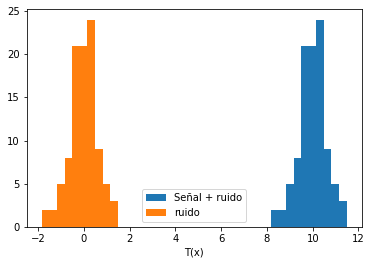

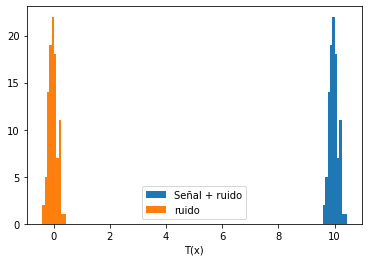

In [8]:
import matplotlib.pyplot as plt
#graficar las probabilidades del estimador
plt.hist(T1sr,label='Señal + ruido')
plt.hist(T1r,label='ruido')
plt.xlabel('T(x)')
plt.legend()
plt.show()

plt.hist(T2sr,label='Señal + ruido')
plt.hist(T2r,label='ruido')
plt.xlabel('T(x)')
plt.legend()
plt.show()

# Ejercicio:

1. Cálcule el coeficiente de desvio para los resultados obtenidos. Ver [https://github.com/amalvarezme/AnaliticaDatos/blob/master/3_Clasificacion/1_TeoriaDeteccion.pdf](https://github.com/amalvarezme/AnaliticaDatos/blob/master/3_Clasificacion/1_TeoriaDeteccion.pdf).

2. Compare la capacidad de detección del estimador $\tilde{A}=x[0]$ respecto al de media muestral $\hat{A} = \frac{1}{N}\sum^N_{n=1} x[n]$.

## Solución Ejercicio

In [9]:
#
d0=np.sqrt(A**2)/varw #solo ruido
d1=np.sqrt(A**2)*N2/varw #con Amplitud en nivel DC
d0,d1


(20.0, 400.0)

1. Se puede conluir de los cálculos de los coeficientes de desvío y de las gráficas obtenidas, lo que ya se esperaba desde la tería, y es que a mayor número de muestras mayor coeficiente de desvío, lo que significa que es más fácil separar la señarl objetivo del ruido asociado:

2. Siempre que se compare el desempeño de un valor puntual del conjunto de datos vs el desempeño de la media como estimador, se tiene que en los dos casos los estimadores son insesgados. Por otro lado, la varianza de la media disminuye asintóticamente respecto a n, mientras que la varianza de un valor puntual del conjunto es constante, heredada de la distribución